In [79]:
from PIL import Image 
from imgbeddings import imgbeddings
import os
import tqdm
from sklearn.metrics.pairwise import pairwise_distances
import pandas as pd
import numpy as np
import cv2
import xml.etree.ElementTree as ET

In [32]:
image_dir = 'data'

#### Кроп изображений из датасета LogoDet-3K

In [34]:
def crop_objects_from_images(data_folder):
    for category in os.listdir(data_folder):
        category_path = os.path.join(data_folder, category)

        for file in os.listdir(category_path):
            if file.endswith(".xml"):
                xml_path = os.path.join(category_path, file)
                
                # Парсинг XML
                tree = ET.parse(xml_path)
                root = tree.getroot()
                
                # Имя изображения
                img_filename = root.find("filename").text
                img_path = os.path.join(category_path, img_filename)

                if not os.path.exists(img_path):
                    print(f"Изображение {img_path} не найдено, пропускаем.")
                    continue

                image = cv2.imread(img_path)
                if image is None:
                    print(f"Ошибка загрузки {img_path}, пропускаем.")
                    continue
                
                # bounding box
                for obj in root.findall("object"):
                    bndbox = obj.find("bndbox")
                    xmin = int(bndbox.find("xmin").text)
                    ymin = int(bndbox.find("ymin").text)
                    xmax = int(bndbox.find("xmax").text)
                    ymax = int(bndbox.find("ymax").text)

                    # кроп
                    cropped = image[ymin:ymax, xmin:xmax]
                    
                    cropped_dir = os.path.join(category_path, "cropped")
                    os.makedirs(cropped_dir, exist_ok=True)

                    cropped_filename = f"cropped_{img_filename}"
                    cropped_path = os.path.join(cropped_dir, cropped_filename)
                    cv2.imwrite(cropped_path, cropped)
                    print(f"Сохранено: {cropped_path}")


In [36]:
samples_folder = os.path.join(image_dir, "samples")
crop_objects_from_images(samples_folder)

Сохранено: data\samples\Apple\cropped\cropped_1.jpg
Сохранено: data\samples\Apple\cropped\cropped_10.jpg
Сохранено: data\samples\Apple\cropped\cropped_14.jpg
Сохранено: data\samples\Apple\cropped\cropped_2.jpg
Сохранено: data\samples\Apple\cropped\cropped_21.jpg
Сохранено: data\samples\Apple\cropped\cropped_25.jpg
Сохранено: data\samples\Apple\cropped\cropped_26.jpg
Сохранено: data\samples\Apple\cropped\cropped_32.jpg
Сохранено: data\samples\Apple\cropped\cropped_33.jpg
Сохранено: data\samples\Apple\cropped\cropped_35.jpg
Сохранено: data\samples\Apple\cropped\cropped_37.jpg
Сохранено: data\samples\Apple\cropped\cropped_39.jpg
Сохранено: data\samples\Apple\cropped\cropped_4.jpg
Сохранено: data\samples\Apple\cropped\cropped_46.jpg
Сохранено: data\samples\Apple\cropped\cropped_47.jpg
Сохранено: data\samples\Apple\cropped\cropped_48.jpg
Сохранено: data\samples\Apple\cropped\cropped_5.jpg
Сохранено: data\samples\Apple\cropped\cropped_50.jpg
Сохранено: data\samples\Apple\cropped\cropped_51.j

#### Получение эмбеддингов с помощью CLIP

In [42]:
def load_images_and_imgbeddings(file_list, image_dir): 
    _imgbeddings = imgbeddings() 
    name2embeddings = dict() 
    for image_filename in tqdm.tqdm(file_list): 
        img_path = os.path.join(image_dir, image_filename) 
        image = Image.open(img_path) 
        embedding = _imgbeddings.to_embeddings(image) 
        name2embeddings[image_filename] = embedding[0] 
    return name2embeddings

In [43]:
dir_Apple = os.path.join(image_dir, 'samples', 'Apple', 'cropped')
dir_Coke = os.path.join(image_dir, 'samples', 'Coca-Cola Zero', 'cropped')

file_list_Apple = os.listdir(dir_Apple)[:] 
file_list_Coke = os.listdir(dir_Coke)[:]

In [44]:
imgbeddings_Apple = load_images_and_imgbeddings(file_list_Apple, dir_Apple)
imgbeddings_Coke = load_images_and_imgbeddings(file_list_Coke, dir_Coke)

c:\Users\Stepan\Desktop\ML Developer\.venv\Lib\site-packages\huggingface_hub\utils\_deprecation.py:131: FutureWarning: 'cached_download' (from 'huggingface_hub.file_download') is deprecated and will be removed from version '0.26'. Use `hf_hub_download` instead.
  warnings.warn(warning_message, FutureWarning)
c:\Users\Stepan\Desktop\ML Developer\.venv\Lib\site-packages\huggingface_hub\file_download.py:672: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(
c:\Users\Stepan\Desktop\ML Developer\.venv\Lib\site-packages\transformers\models\clip\processing_clip.py:149: FutureWarning: `feature_extractor` is deprecated and will be removed in v5. Use `image_processor` instead.
  warnings.warn(
100%|██████████| 69/69 [00:00<00:00, 76.16it/s]


In [45]:
test_folder = os.path.join(image_dir, "test")
crop_objects_from_images(test_folder)

Сохранено: data\test\Apple\cropped\cropped_92.jpg
Сохранено: data\test\Apple\cropped\cropped_93.jpg
Сохранено: data\test\Apple\cropped\cropped_94.jpg
Сохранено: data\test\Apple\cropped\cropped_96.jpg
Сохранено: data\test\Apple\cropped\cropped_99.jpg
Сохранено: data\test\Coca-Cola Zero\cropped\cropped_86.jpg
Сохранено: data\test\Coca-Cola Zero\cropped\cropped_87.jpg
Сохранено: data\test\Coca-Cola Zero\cropped\cropped_89.jpg
Сохранено: data\test\Coca-Cola Zero\cropped\cropped_90.jpg
Сохранено: data\test\Coca-Cola Zero\cropped\cropped_91.jpg


In [47]:
dir_Apple = os.path.join(image_dir, 'test', 'Apple', 'cropped')
dir_Coke = os.path.join(image_dir, 'test', 'Coca-Cola Zero', 'cropped')

file_list_Apple = os.listdir(dir_Apple)[:] 
file_list_Coke = os.listdir(dir_Coke)[:]

In [ ]:
test_imgbeddings_Apple = load_images_and_imgbeddings(file_list_Apple, dir_Apple)
test_imgbeddings_Coke = load_images_and_imgbeddings(file_list_Coke, dir_Coke)

100%|██████████| 5/5 [00:00<00:00, 61.18it/s]


#### Получение результатов на примерах

In [100]:
import matplotlib.pyplot as plt

In [80]:
def find_min_distance(test_embedding, reference_embeddings, metric='cosine'):
    distances = pairwise_distances(test_embedding.reshape(1, -1), reference_embeddings, metric=metric)
    return np.min(distances)

In [81]:
def classify_image(test_embedding, reference_embeddings_dict, threshold=0.3, metric='cosine'):
    reference_embeddings = np.array(list(reference_embeddings_dict.values()))
    min_distance = find_min_distance(test_embedding, reference_embeddings, metric)
    return min_distance < threshold, min_distance

In [92]:
threshold = 0.1

Изображение: cropped_92.jpg | Принадлежит множеству Apple: True | Расстояние: 0.0633
Изображение: cropped_93.jpg | Принадлежит множеству Apple: True | Расстояние: 0.0476
Изображение: cropped_94.jpg | Принадлежит множеству Apple: True | Расстояние: 0.0885
Изображение: cropped_96.jpg | Принадлежит множеству Apple: True | Расстояние: 0.0993
Изображение: cropped_99.jpg | Принадлежит множеству Apple: False | Расстояние: 0.1631


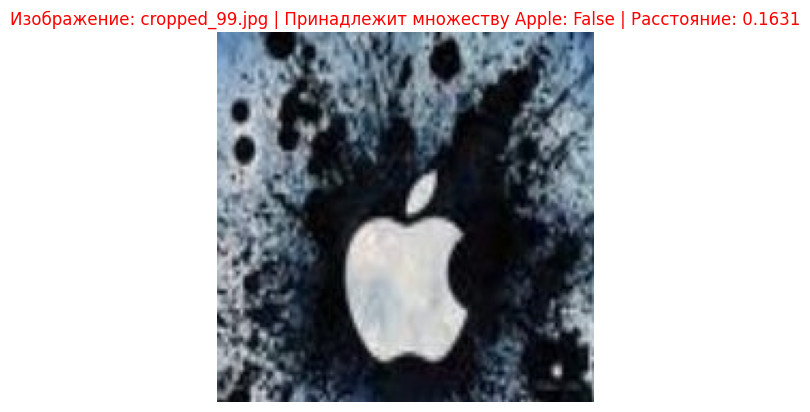

In [109]:
for img_name, test_embedding in test_imgbeddings_Apple.items():
    is_match, distance = classify_image(test_embedding, imgbeddings_Apple, threshold)
    print(f"Изображение: {img_name} | Принадлежит множеству Apple: {is_match} | Расстояние: {distance:.4f}")
    if not is_match:
        im = cv2.imread(os.path.join(dir_Apple, img_name))
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        plt.imshow(im)
        plt.axis('off')
        plt.title(f"Изображение: {img_name} | Принадлежит множеству Apple: {is_match} | Расстояние: {distance:.4f}", color='r')

In [110]:
for img_name, test_embedding in test_imgbeddings_Coke.items():
    is_match, distance = classify_image(test_embedding, imgbeddings_Apple, threshold)
    print(f"Изображение: {img_name} | Принадлежит множеству Apple: {is_match} | Расстояние: {distance:.4f}")
    if is_match:
        im = cv2.imread(os.path.join(dir_Coke, img_name))
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        plt.imshow(im)
        plt.axis('off')
        plt.title(f"Изображение: {img_name} | Принадлежит множеству Apple: {is_match} | Расстояние: {distance:.4f}", color='r')

Изображение: cropped_86.jpg | Принадлежит множеству Apple: False | Расстояние: 0.2345
Изображение: cropped_87.jpg | Принадлежит множеству Apple: False | Расстояние: 0.2202
Изображение: cropped_89.jpg | Принадлежит множеству Apple: False | Расстояние: 0.1461
Изображение: cropped_90.jpg | Принадлежит множеству Apple: False | Расстояние: 0.3086
Изображение: cropped_91.jpg | Принадлежит множеству Apple: False | Расстояние: 0.1819


In [111]:
for img_name, test_embedding in test_imgbeddings_Apple.items():
    is_match, distance = classify_image(test_embedding, imgbeddings_Coke, threshold)
    print(f"Изображение: {img_name} | Принадлежит множеству Coke: {is_match} | Расстояние: {distance:.4f}")
    if is_match:
        im = cv2.imread(os.path.join(dir_Apple, img_name))
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        plt.imshow(im)
        plt.axis('off')
        plt.title(f"Изображение: {img_name} | Принадлежит множеству Apple: {is_match} | Расстояние: {distance:.4f}", color='r')

Изображение: cropped_92.jpg | Принадлежит множеству Coke: False | Расстояние: 0.2866
Изображение: cropped_93.jpg | Принадлежит множеству Coke: False | Расстояние: 0.1723
Изображение: cropped_94.jpg | Принадлежит множеству Coke: False | Расстояние: 0.1023
Изображение: cropped_96.jpg | Принадлежит множеству Coke: False | Расстояние: 0.1565
Изображение: cropped_99.jpg | Принадлежит множеству Coke: False | Расстояние: 0.2811


In [112]:
for img_name, test_embedding in test_imgbeddings_Coke.items():
    is_match, distance = classify_image(test_embedding, imgbeddings_Coke, threshold)
    print(f"Изображение: {img_name} | Принадлежит множеству Coke: {is_match} | Расстояние: {distance:.4f}")
    if not is_match:
        im = cv2.imread(os.path.join(dir_Coke, img_name))
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        plt.imshow(im)
        plt.axis('off')
        plt.title(f"Изображение: {img_name} | Принадлежит множеству Apple: {is_match} | Расстояние: {distance:.4f}", color='r')

Изображение: cropped_86.jpg | Принадлежит множеству Coke: True | Расстояние: 0.0676
Изображение: cropped_87.jpg | Принадлежит множеству Coke: True | Расстояние: 0.0394
Изображение: cropped_89.jpg | Принадлежит множеству Coke: True | Расстояние: 0.0601
Изображение: cropped_90.jpg | Принадлежит множеству Coke: True | Расстояние: 0.0196
Изображение: cropped_91.jpg | Принадлежит множеству Coke: True | Расстояние: 0.0327
